<a href="https://colab.research.google.com/github/aioshi21chowdhury/baby_cry_lang/blob/main/mobile_net(accident_detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # Select the 'kaggle.json' file downloaded from Kaggle


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aioshichowdhury","key":"c403ded3833a021f35813c9d0325a1f7"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset


Dataset URL: https://www.kaggle.com/datasets/suryaprabhakaran2005/road-accidents-from-cctv-footages-dataset
License(s): MIT
 98% 660M/670M [00:03<00:00, 249MB/s]
100% 670M/670M [00:03<00:00, 191MB/s]


In [ ]:
!unzip road-accidents-from-cctv-footages-dataset.zip -d /content/AccidentDataset



Streaming output truncated to the last 5000 lines.
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/387.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/388.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/389.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/39.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/390.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/391.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/392.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/393.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severity Score Dataset with Labels/1/394.jpg  
  inflating: /content/AccidentDataset/SeverityScore/Severit

In [ ]:
import os

# Check extracted dataset directory
video_data_dir = '/content/AccidentDataset'
print(os.listdir(video_data_dir))


['SeverityScore', 'Accident', 'NonAccident']


In [ ]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 57.2 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import imageio
import imgaug.augmenters as iaa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

IMG_SIZE = 128
ColorChannels = 3

# Function to load video frames
def video_to_frames(video):
    vidcap = cv2.VideoCapture(video)
    frames = []
    while vidcap.isOpened():
        success, image = vidcap.read()
        if not success:
            break
        resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        frames.append(resized)
    vidcap.release()
    return frames

# Classes
CLASSES = ["NonAccident", "Accident"]

# Directory setup for accident and non-accident videos
data_dir = '/content/AccidentDataset/Accident'
accident_dir = os.path.join(data_dir, 'Accident')
non_accident_dir = os.path.join(data_dir, 'NonAccident')

# Function to load videos for each category
def load_category_videos(category_dir, class_num):
    X_data = []
    y_data = []
    for video in tqdm(os.listdir(category_dir)):
        video_path = os.path.join(category_dir, video)
        frames = video_to_frames(video_path)
        for frame in frames:
            X_data.append(frame)
            y_data.append(class_num)
    return X_data, y_data

# Load Accident and Non-Accident data
X_accident, y_accident = load_category_videos(accident_dir, CLASSES.index("Accident"))
X_non_accident, y_non_accident = load_category_videos(non_accident_dir, CLASSES.index("NonAccident"))

# Combine accident and non-accident data
X_data = np.array(X_accident + X_non_accident).reshape(-1, IMG_SIZE, IMG_SIZE, ColorChannels)
y_data = np.array(y_accident + y_non_accident)

# Split the data into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Normalize the data (pixel values scaled between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

100%|██████████| 7710/7710 [00:09<00:00, 823.70it/s]


In [ ]:
#checking for the number of video
import os

# Paths to the directories containing accident and non-accident videos
accident_dir = '/content/AccidentDataset/Accident/Accident'
non_accident_dir = '/content/AccidentDataset/Accident/NonAccident'

# Count videos in each class
num_accident_videos = len([file for file in os.listdir(accident_dir) if file.endswith(('.mp4', '.avi', '.mov','.jpg'))])
num_non_accident_videos = len([file for file in os.listdir(non_accident_dir) if file.endswith(('.mp4', '.avi', '.mov','.jpg'))])

print(f"Number of Accident videos: {num_accident_videos}")
print(f"Number of Non-Accident videos: {num_non_accident_videos}")


Number of Accident videos: 6191
Number of Non-Accident videos: 7710


In [ ]:
import os
import random

# Directory containing the Non-Accident images
non_accident_dir = '/content/AccidentDataset/Accident/NonAccident'

# Get a list of all .jpg files in the directory
jpg_files = [file for file in os.listdir(non_accident_dir) if file.endswith('.jpg')]

# Calculate the number of files to delete to reduce the count by half
num_files_to_delete = len(jpg_files) // 2

# Randomly select files to delete
files_to_delete = random.sample(jpg_files, num_files_to_delete)

# Delete the selected files
for file in files_to_delete:
    file_path = os.path.join(non_accident_dir, file)
    os.remove(file_path)
    print(f"Deleted: {file_path}")

print(f"Reduced Non-Accident images by half. Deleted {num_files_to_delete} files.")


Streaming output truncated to the last 5000 lines.
Deleted: /content/AccidentDataset/Accident/NonAccident/5427.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/4645.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/2945.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/14541.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/8292.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/13980.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/4565.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/10032.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/13784.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/13711.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/4073.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/3824.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/4754.jpg
Deleted: /content/AccidentDataset/Accident/NonAccident/11459.jpg
Deleted: /content/AccidentDataset/Accident/NonA

In [ ]:
#transfer learning (mobile_net)

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_accident_detection_model():
    # IMG_SIZE = 128 # Defining IMG_SIZE inside the function
    #ColorChannels = 3 # Defining ColorChannels inside the function
    input_tensor = Input(shape=(IMG_SIZE, IMG_SIZE, ColorChannels))
    base_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=input_tensor, pooling='avg')

    head = base_model.output
    head = Dense(128, activation="relu")(head)
    head = Dropout(0.5)(head)
    head = Dense(1, activation="sigmoid")(head)

    model = Model(inputs=base_model.input, outputs=head)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

model = create_accident_detection_model()
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']      

In [ ]:



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
# Assuming IMG_SIZE and ColorChannels are defined elsewhere
IMG_SIZE = 128
ColorChannels = 3
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, ColorChannels)),  # Adjusted input shape
    MaxPooling2D((2, 2)),

    # Adding Dropout layer after the first Conv layer
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Adding Dropout layer after the second Conv layer
    Dropout(0.25),

    Flatten(),

    Dense(128, activation='relu'),

    # Adding Dropout layer before the output layer
    Dropout(0.5),

    Dense(1, activation='sigmoid') # Use sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Use binary_crossentropy for binary classification

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.1)


Epoch 1/10
501/501 [==============================] - 293s 582ms/step - loss: 0.5970 - accuracy: 0.7009 - val_loss: 0.3975 - val_accuracy: 0.8147
Epoch 2/10
501/501 [==============================] - 288s 576ms/step - loss: 0.3553 - accuracy: 0.8377 - val_loss: 0.2709 - val_accuracy: 0.8651
Epoch 3/10
501/501 [==============================] - 284s 567ms/step - loss: 0.2563 - accuracy: 0.8854 - val_loss: 0.1791 - val_accuracy: 0.9182
Epoch 4/10
501/501 [==============================] - 279s 557ms/step - loss: 0.1983 - accuracy: 0.9114 - val_loss: 0.1354 - val_accuracy: 0.9379
Epoch 5/10
501/501 [==============================] - 275s 550ms/step - loss: 0.1634 - accuracy: 0.9292 - val_loss: 0.1035 - val_accuracy: 0.9595
Epoch 6/10
501/501 [==============================] - 278s 556ms/step - loss: 0.1371 - accuracy: 0.9426 - val_loss: 0.1029 - val_accuracy: 0.9622
Epoch 7/10
501/501 [==============================] - 277s 554ms/step - loss: 0.1123 - accuracy: 0.9559 - val_loss: 0.0683 -

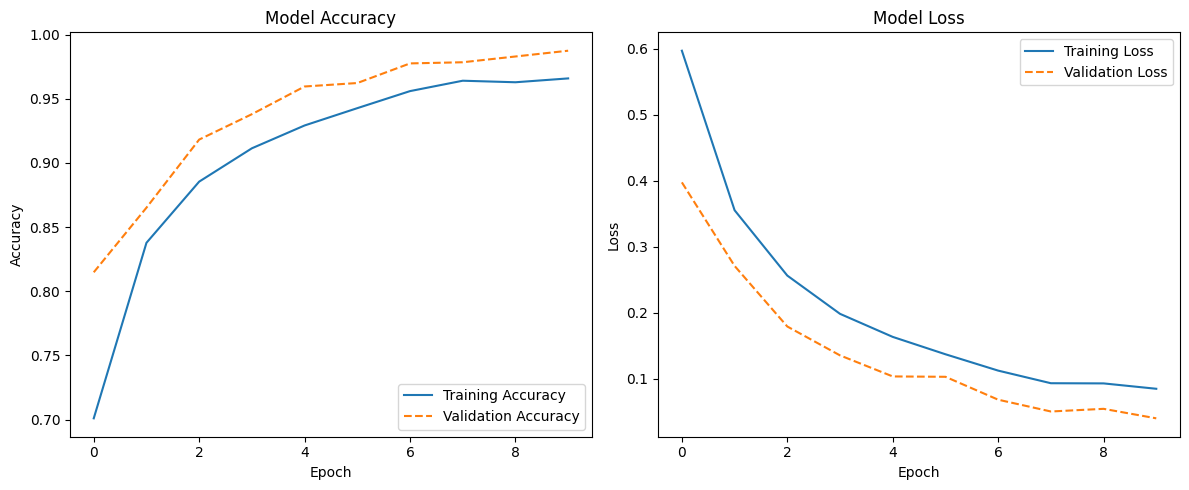

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# Convert one-hot encoded y_test to binary labels if necessary
if len(y_test.shape) > 1 and y_test.shape[1] == 10:  # Assuming 10 is the number of one-hot columns
    y_test = np.argmax(y_test, axis=1)  # Convert to binary labels (0 or 1)


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test set
y_pred = model.predict(X_test, verbose=0)
y_pred_labels = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels
y_test_labels = y_test.flatten()  # Ensure y_test is a flattened binary array

# Calculate F1-score
f1 = f1_score(y_test_labels, y_pred_labels)

# Display results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")


Test Loss: 0.0449
Test Accuracy: 98.85%
F1 Score: 0.9871


In [ ]:
#save the model

from tensorflow.keras.models import load_model


model.save(os.path.join('models','moble_net_model_car_accident_detection.h5'))

import os
from tensorflow.keras.models import load_model

# Assuming the model was saved as 'imageclassifier.h5' in the 'models' directory
new_model = load_model(os.path.join('models','moble_net_model_car_accident_detection.h5'))